# $$ Data\ Analysis\ and\ clustering\ of\ Mall\ Customers\ Data $$

In [38]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np 
import matplotlib.ticker as mticker
#for data analysis

import pandas as pd

import numpy as np


# for data visualization

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

#get the data

from sklearn.datasets import make_blobs

# for K means clustering

from sklearn.cluster import KMeans

# to avoid warning

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Preparing randomly generated dataset using the make_blobs class of sklearn.datasets li

## Importing Data:

In [3]:
df=pd.read_csv('Proj3_MallCustomers_Data_Project.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
def data_type(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<25:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous
categorical,continuous=data_type(df)
print(tabulate({'categorical':categorical,'continuous':continuous},headers=['categorical','continuous']))

categorical    continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


# $$ Univariate \ Data \ Analysis $$

In [10]:
def info_of(col):
    print(f"unique values in {col} are: {df[col].unique()}")
    print(f"mode of {col} are: {df[col].mode()[0]}") 
    print(f"number of missing values in {col} is: {df[col].isnull().sum()}") 
    if df[col].isnull().sum()>0:
        print(f"there are null values in: {col} column")

In [11]:
info_of('Gender')

unique values in Gender are: ['Male' 'Female']
mode of Gender are: Female
number of missing values in Gender is: 0


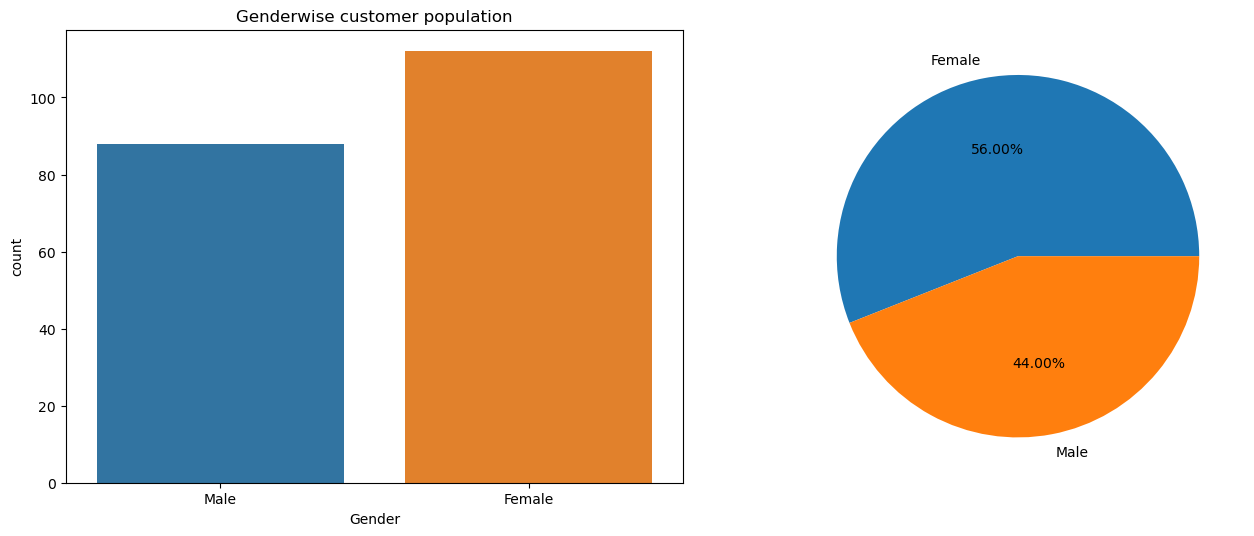

In [12]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title('Genderwise customer population')
targets=df.Gender.value_counts()
labels=list(df.Gender.value_counts().index)

sns.countplot(x=df.Gender,ax=ax[0])
plt.pie(targets,labels=labels,autopct= "%0.2f%%")
plt.tight_layout(pad=3)
plt.show()

### Female customers are more in number than male customers.

## Univariate analysis of numerical columns:

In [13]:
def info_of_num(col):
    print(f"mean of {col} is {df[col].mean()}")
    print(f"median of {col} is {df[col].median()}")
    print(f"mode of {col} is {df[col].mode()[0]}")
    print(f"standard deviation of {col} is {df[col].std()}")
    print(f"number of missing values of {col} is {df[col].isnull().sum()}")

In [15]:
info_of_num('Age')

mean of Age is 38.85
median of Age is 36.0
mode of Age is 32
standard deviation of Age is 13.969007331558883
number of missing values of Age is 0


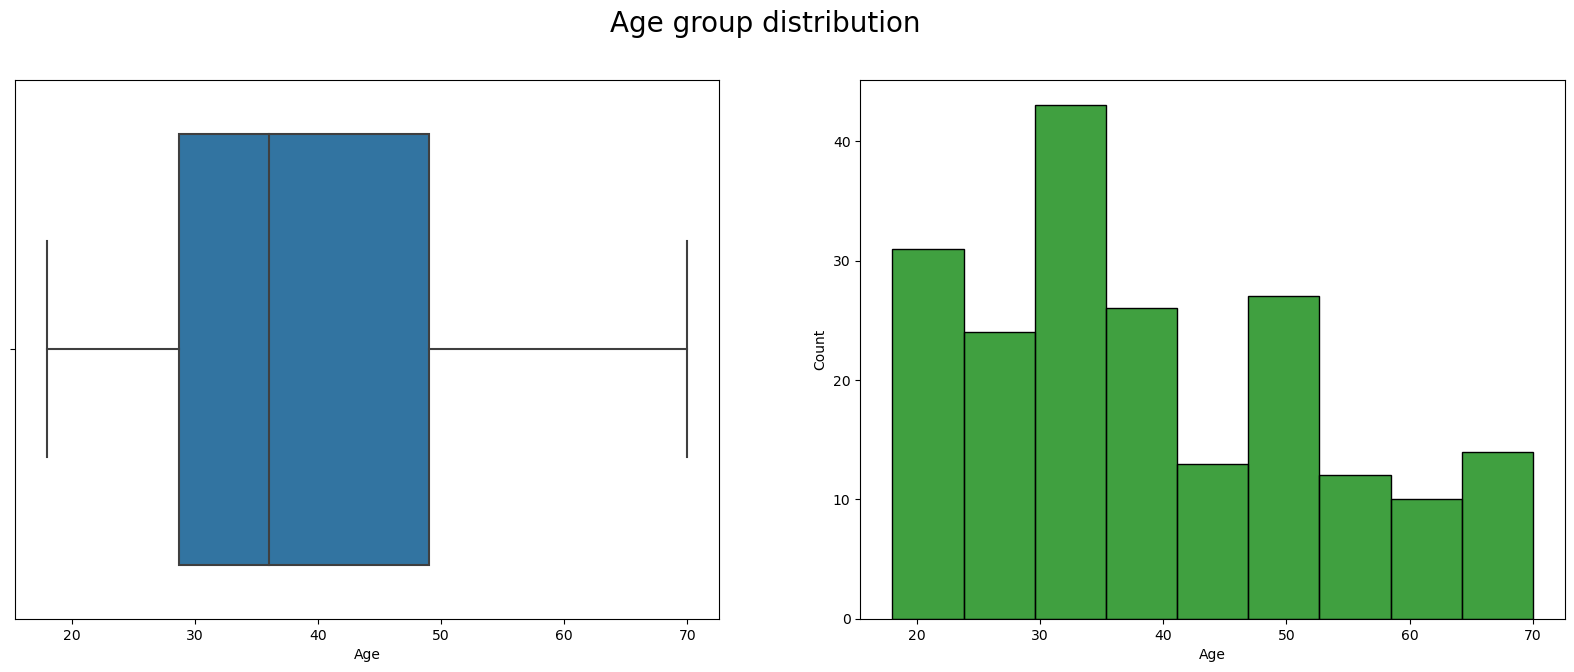

In [17]:
fig, ax = plt.subplots(1,2,figsize= (20, 7))
plt.suptitle('Age group distribution',fontsize=20)
sns.boxplot(x=df.Age,ax=ax[0])
sns.histplot(x=df.Age,ax=ax[1],color='g')
plt.show()

### Age group is mostly distributed between 27 and 50.

In [18]:
info_of_num('Annual Income (k$)')

mean of Annual Income (k$) is 60.56
median of Annual Income (k$) is 61.5
mode of Annual Income (k$) is 54
standard deviation of Annual Income (k$) is 26.264721165271254
number of missing values of Annual Income (k$) is 0


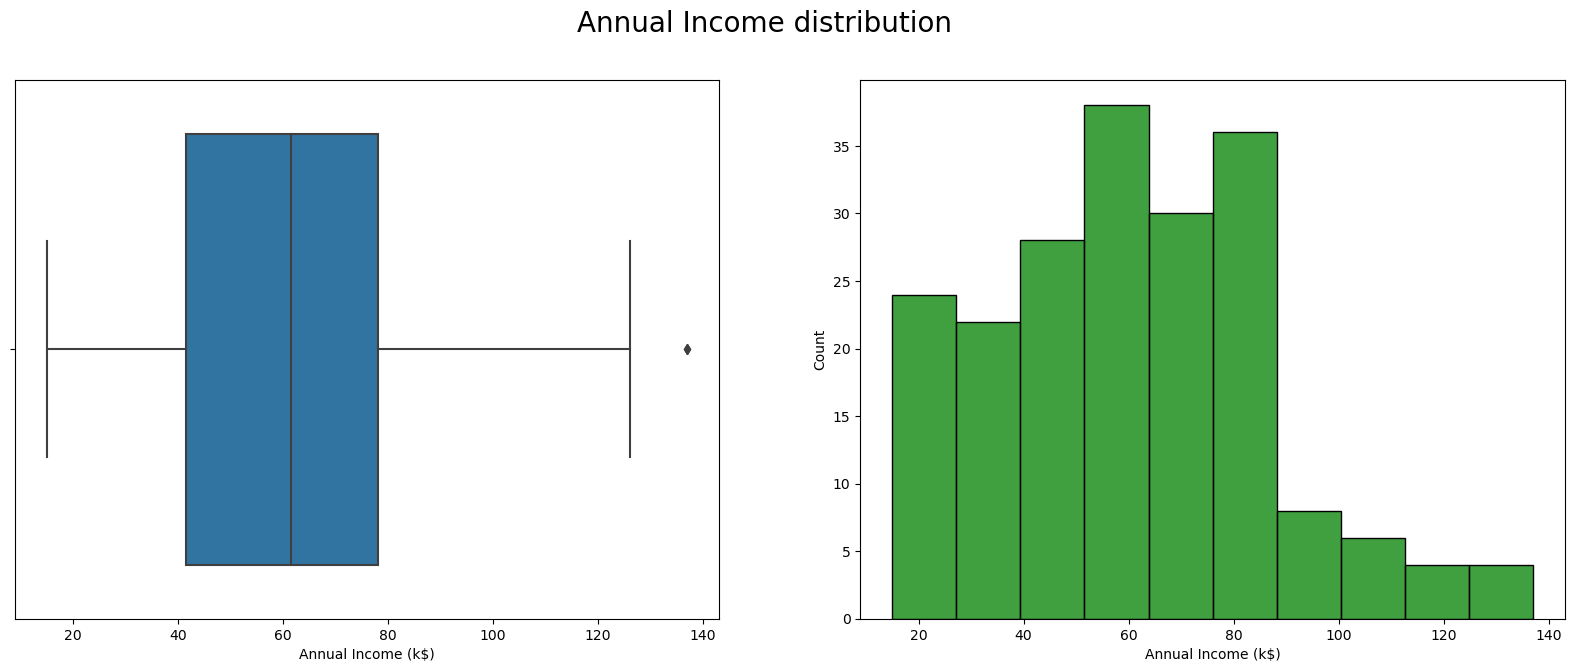

In [20]:
fig, ax = plt.subplots(1,2,figsize= (20, 7))
plt.suptitle('Annual Income distribution',fontsize=20)
sns.boxplot(x=df['Annual Income (k$)'],ax=ax[0])
sns.histplot(x=df['Annual Income (k$)'],ax=ax[1],color='g')
plt.show()

### Annual income is mostly distributed between 20k and 80k.

In [21]:
info_of_num('Spending Score (1-100)')

mean of Spending Score (1-100) is 50.2
median of Spending Score (1-100) is 50.0
mode of Spending Score (1-100) is 42
standard deviation of Spending Score (1-100) is 25.823521668370162
number of missing values of Spending Score (1-100) is 0


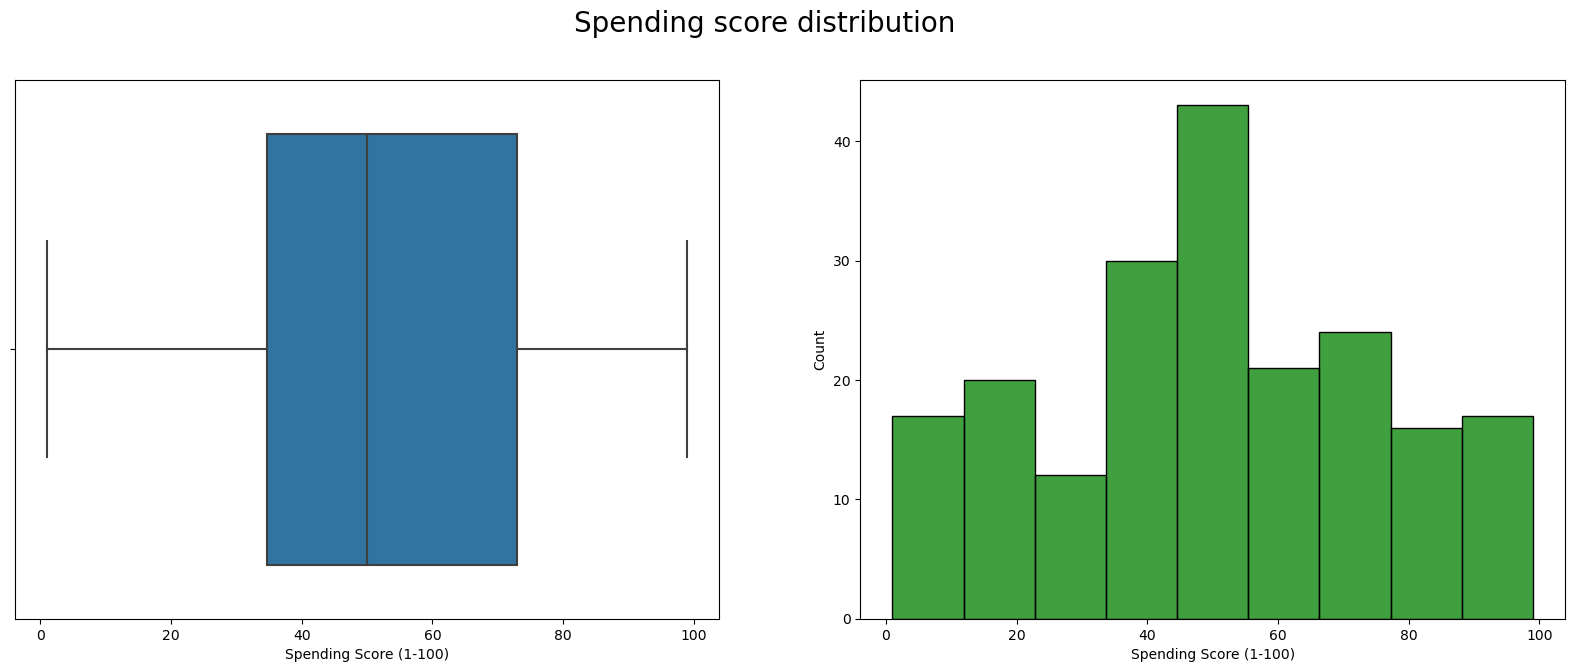

In [30]:
fig, ax = plt.subplots(1,2,figsize= (20, 7))
plt.suptitle('Spending score distribution',fontsize=20)
sns.boxplot(x=df['Spending Score (1-100)'],ax=ax[0])
sns.histplot(x=df['Spending Score (1-100)'],ax=ax[1],color='g')
plt.show()

### Spending score is mostly distributed between 30 and 75.

# $$ Bivariate \ Data \ Analysis $$

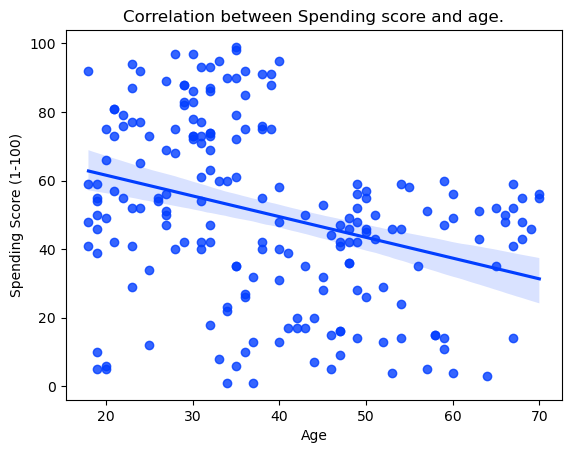

In [156]:
sns.regplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Correlation between Spending score and age.',fontsize=12);

### Age and spending score has a negative correlation.

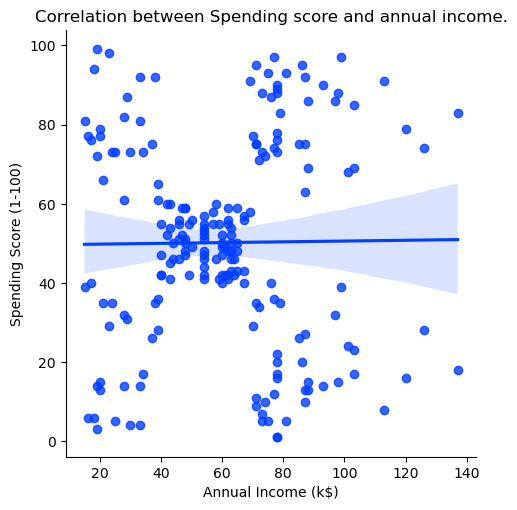

In [157]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.title('Correlation between Spending score and annual income.',fontsize=12);

### Annual income and spending score has a zero correlation.

# Label Encoding:

In [242]:
df1=df.copy()

In [243]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
df1['gender_encode']= preprocessing.LabelEncoder().fit_transform(df1.Gender)

In [244]:
df1.drop(['Gender','CustomerID'],axis=1,inplace=True)

## KMeans clustering:

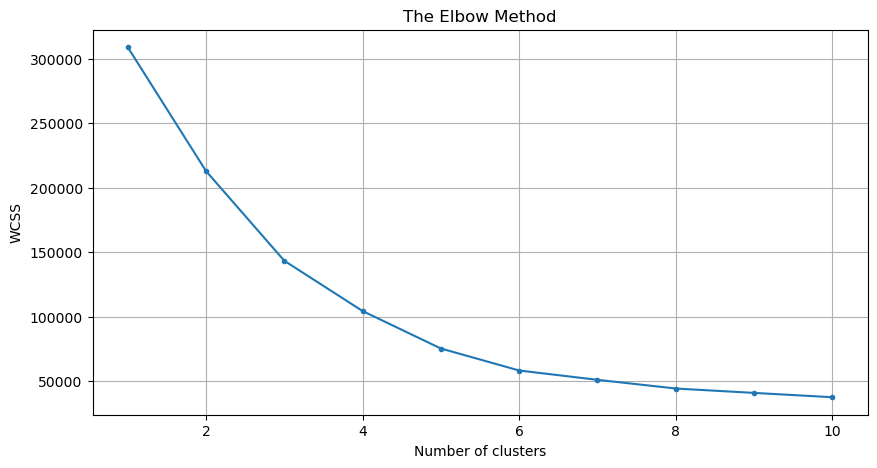

In [69]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
fig=plt.figure(figsize=(10,5))
#fig.set_size_inches(18, 7)
plt.plot(range(1,11),wcss,marker='.')
plt.title('The Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Elbow method provides 3 clusters as good for clustering.

## Data scaling:

In [245]:
scale=StandardScaler()
scaled_df=pd.DataFrame(scale.fit_transform(df1.to_numpy()),columns=df1.columns)

In [176]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


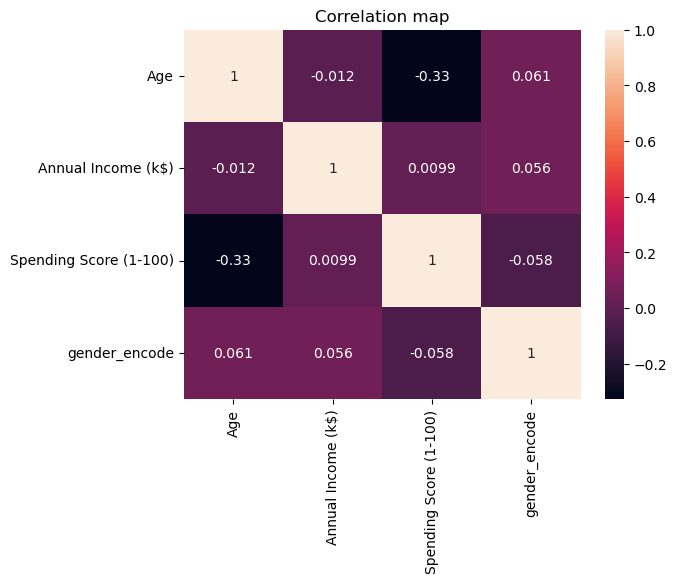

In [158]:
sns.heatmap(scaled_df.corr(),annot=True)
plt.title('Correlation map');

## Silhouette score:

For n_clusters = 2 The average silhouette_score is : 0.28640637225274423
For n_clusters = 3 The average silhouette_score is : 0.46658474419000145
For n_clusters = 4 The average silhouette_score is : 0.4939069237513199
For n_clusters = 5 The average silhouette_score is : 0.5546571631111091
For n_clusters = 6 The average silhouette_score is : 0.5377141165734254


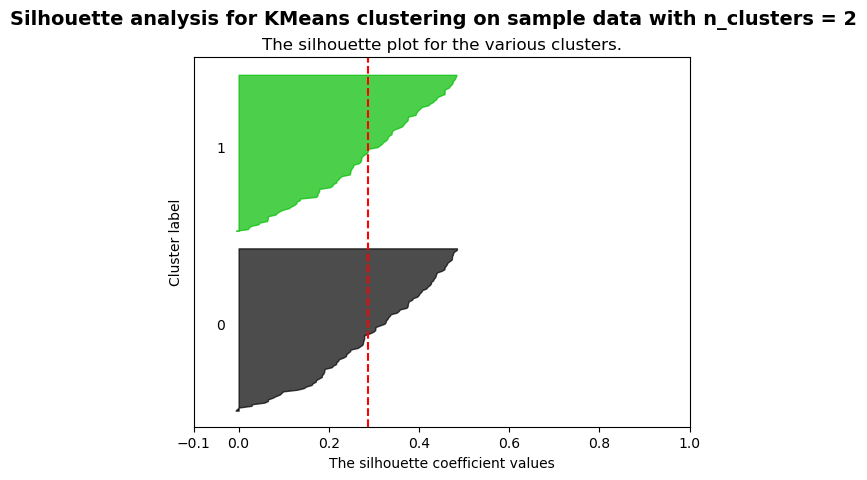

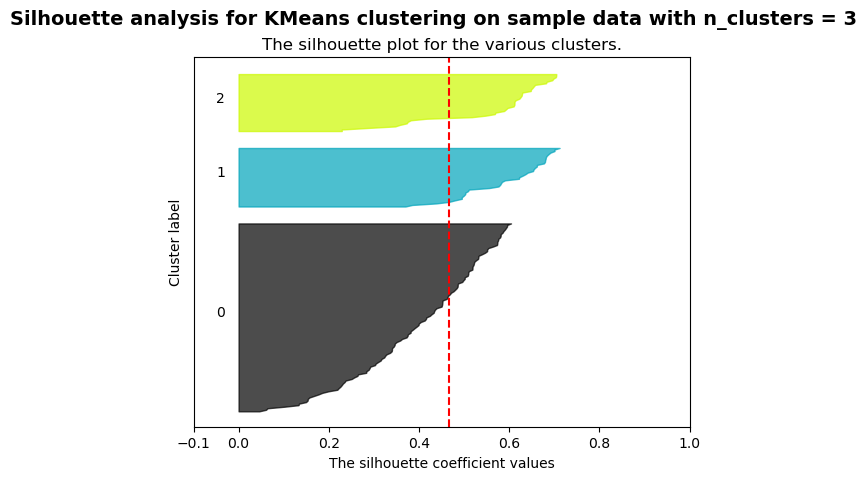

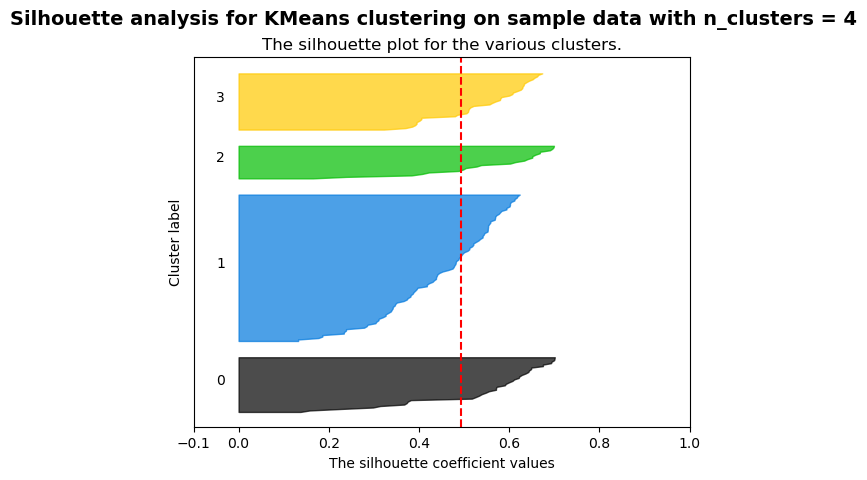

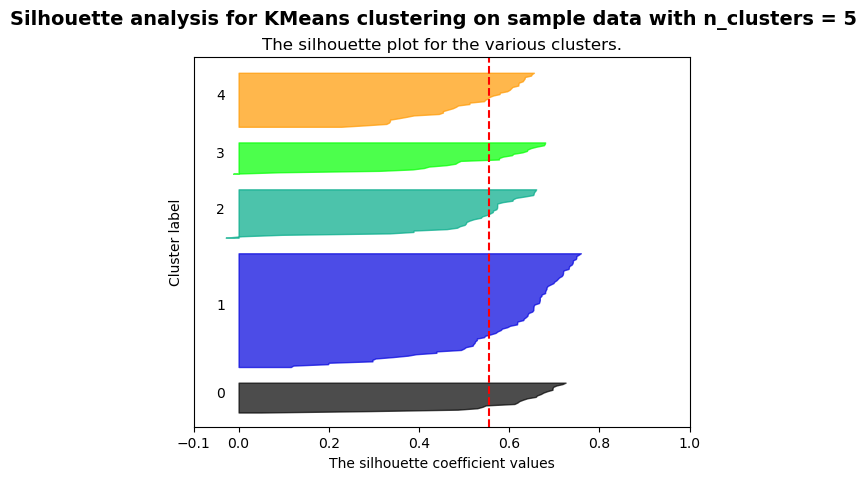

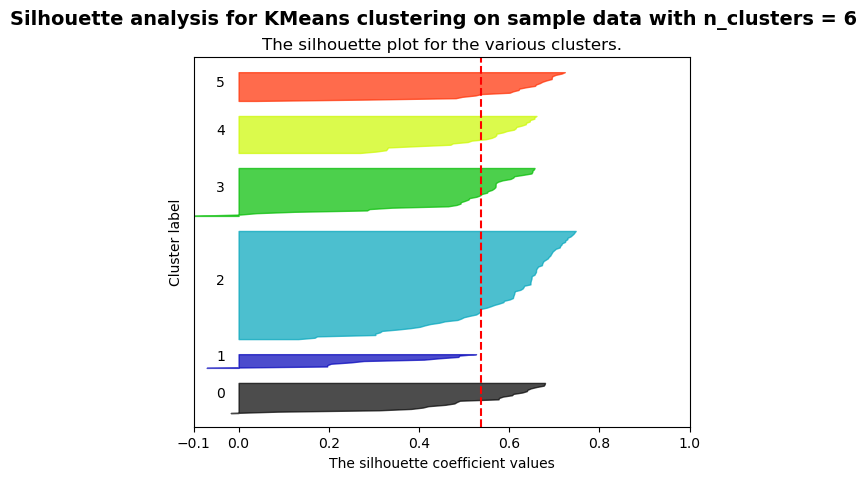

In [180]:
X=scaled_df[['Annual Income (k$)','Spending Score (1-100)']]
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### For KMeans clustering, 6 clusters give the best silhouette score. Considering elbow method and silhouette method, we can take 5 clusters into consideration.

In [246]:
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(X)

KMeans(n_clusters=5)

In [247]:
cluster_centroid_3 = Kmeans_model.cluster_centers_
cluster_centroid_3

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788]])

In [248]:
labels_3 = Kmeans_model.labels_
labels_3

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

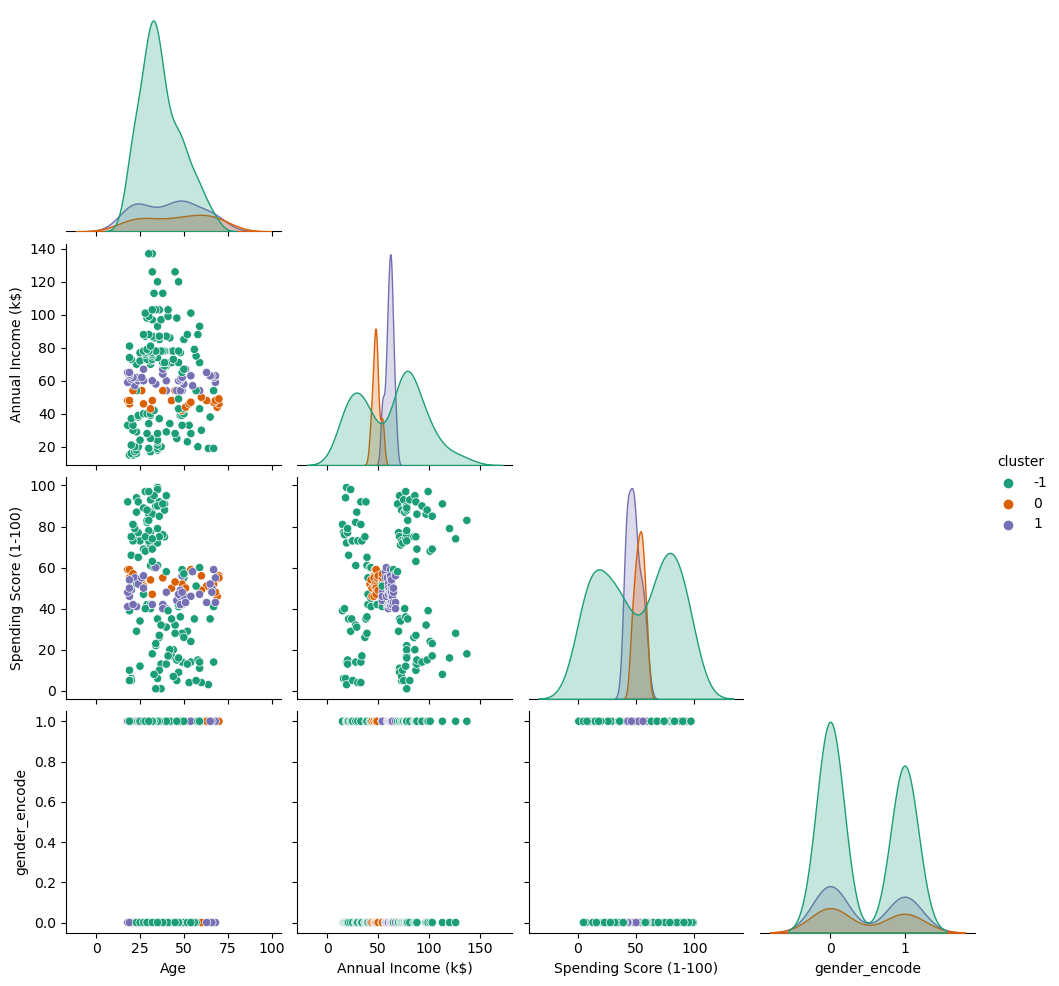

In [249]:
df1['cluster']=cluster_labels

sns.set_palette("bright")
sns.pairplot(df1,kind="scatter",hue="cluster",corner=True,palette='Dark2')
plt.show()

## Displaying clusters and its features:

In [268]:
df1[df1.cluster==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,45.782609,48.000000,52.782609,0.434783,0.0
std,18.532420,3.464102,4.033457,0.506870,0.0
min,18.000000,42.000000,46.000000,0.000000,0.0
25%,29.000000,46.000000,50.000000,0.000000,0.0
50%,49.000000,48.000000,53.000000,0.000000,0.0
75%,61.500000,49.500000,55.500000,1.000000,0.0
max,70.000000,54.000000,59.000000,1.000000,0.0


In [269]:
df1[df1.cluster==1].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,41.564103,60.871795,48.076923,0.435897,1.0
std,16.853541,3.671938,5.704959,0.502356,0.0
min,18.000000,54.000000,40.000000,0.000000,1.0
25%,25.000000,59.000000,43.000000,0.000000,1.0
50%,46.000000,62.000000,48.000000,0.000000,1.0
75%,52.500000,63.000000,52.000000,1.000000,1.0
max,68.000000,67.000000,60.000000,1.000000,1.0


In [274]:
df1[df1.cluster==-1].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster
count,138.000000,138.000000,138.000000,138.000000,138.0
mean,36.927536,62.565217,50.369565,0.442029,-1.0
std,11.645392,31.077242,30.896124,0.498437,0.0
min,18.000000,15.000000,1.000000,0.000000,-1.0
25%,29.000000,33.000000,20.000000,0.000000,-1.0
50%,35.000000,71.000000,51.500000,0.000000,-1.0
75%,45.000000,85.000000,77.000000,1.000000,-1.0
max,67.000000,137.000000,99.000000,1.000000,-1.0


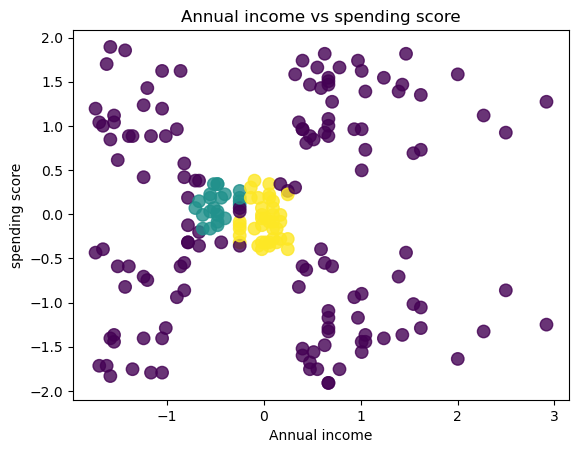

In [258]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=df1.cluster.astype(float),s=80,alpha=0.8)
plt.title("Annual income vs spending score")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()

### Cluster 0 has customers with average age of 45 and income around 48k and spending score around 52 as average.

### Cluster 1 has customers with average age of 41 and income around 60k and spending score around 50 as average.

### Cluster -1 has customers with average age of 36 and income around 62k and spending score around 50 as average.

## Agglomerative clustering:

In [84]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [191]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3842337621772661
For n_clusters = 3 The average silhouette_score is : 0.4610481446570447
For n_clusters = 4 The average silhouette_score is : 0.4925507715349343
For n_clusters = 5 The average silhouette_score is : 0.5538089226688662
For n_clusters = 6 The average silhouette_score is : 0.5386761871036926


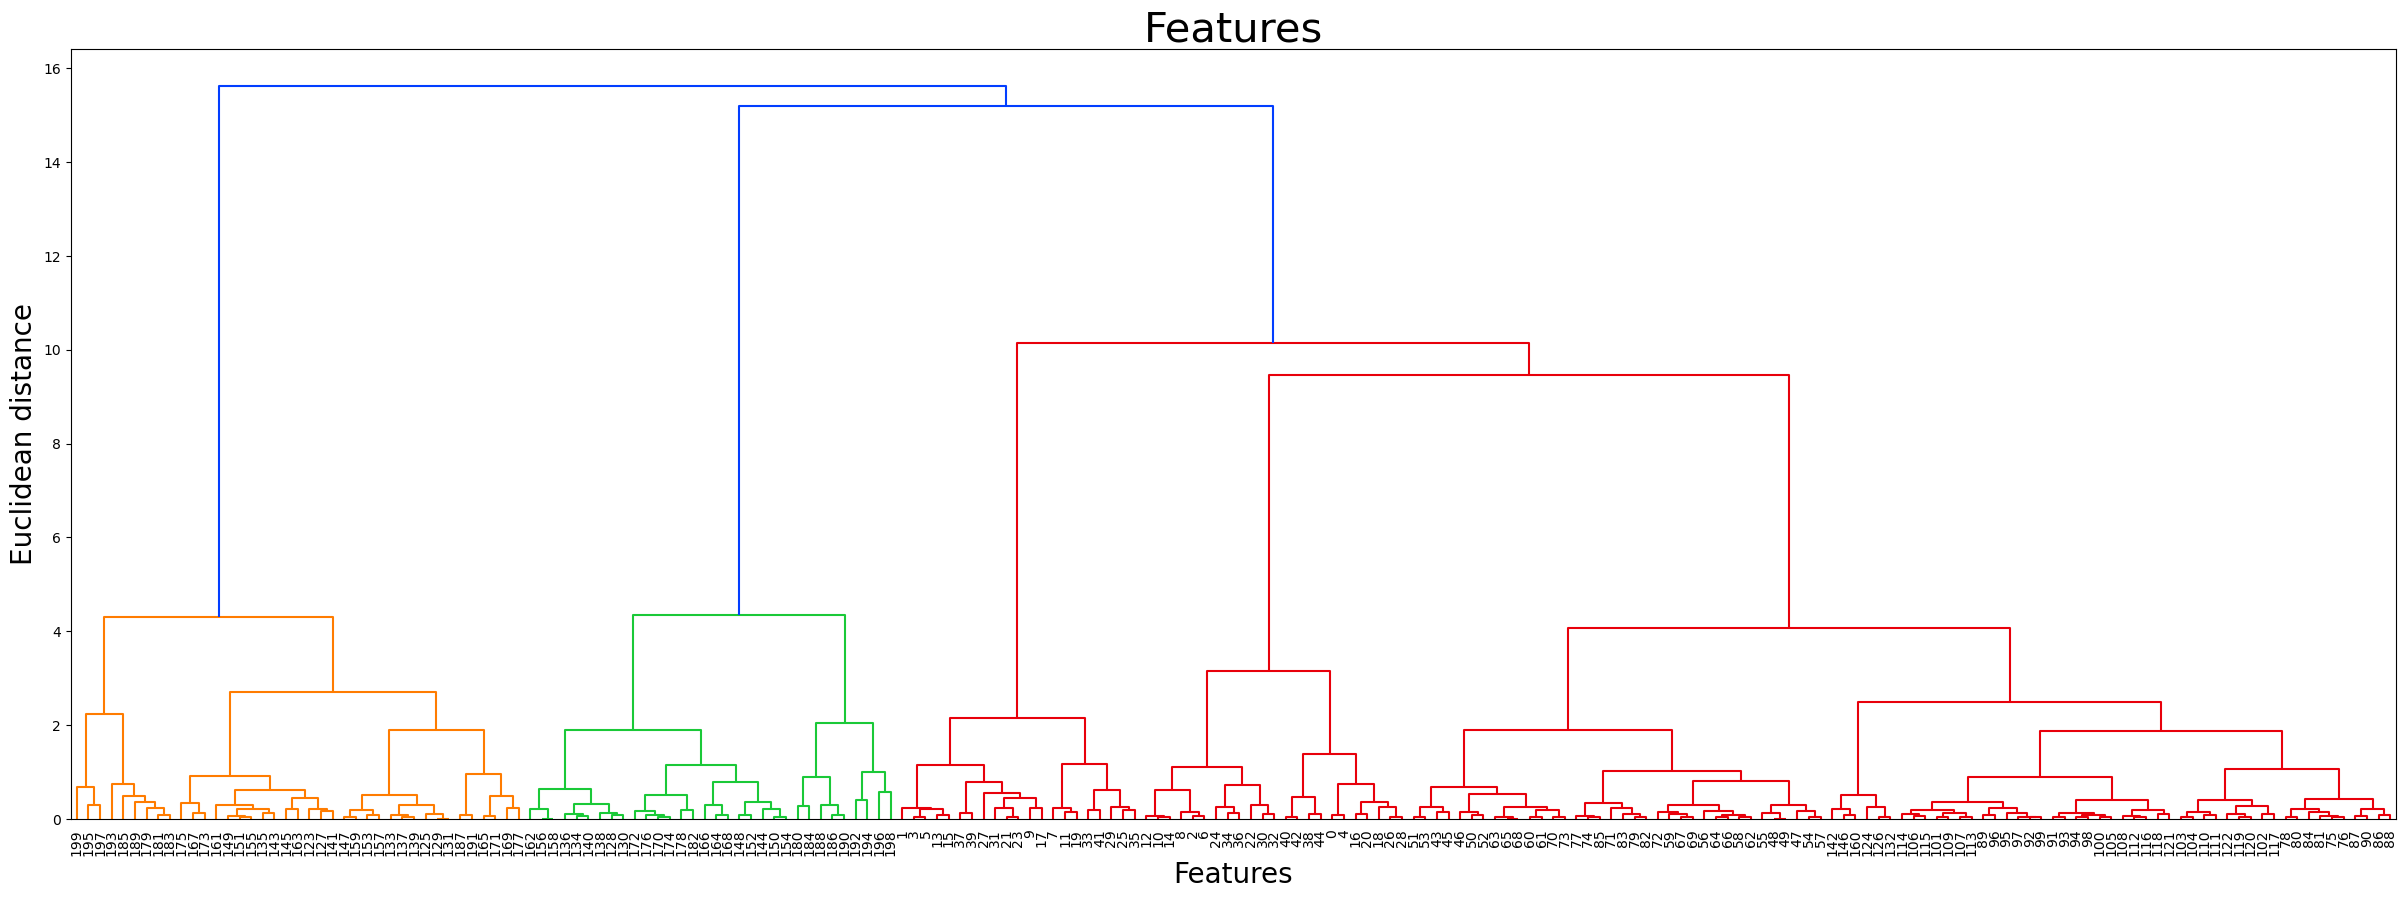

In [192]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Features',fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

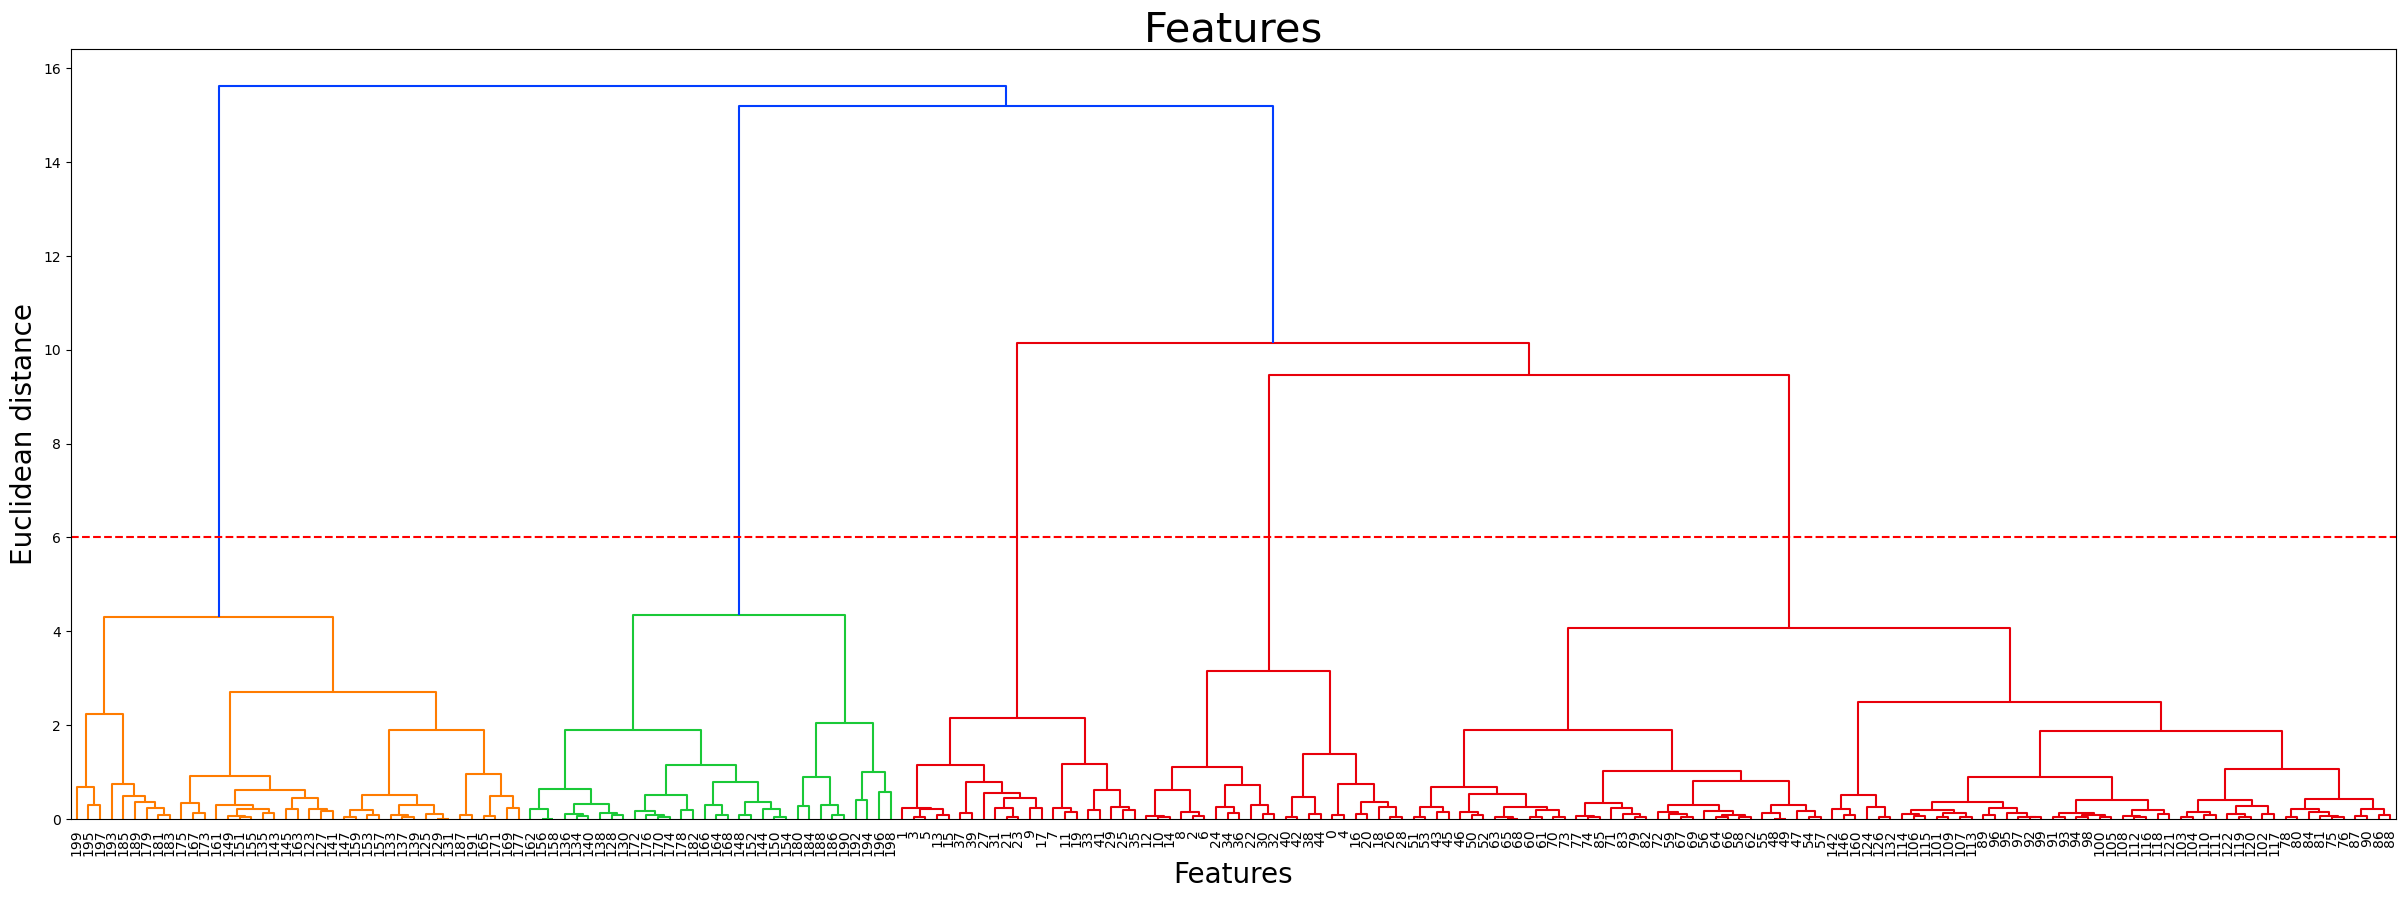

In [194]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df1.index)
plt.axhline(y=6, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Features',fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### For Euclidean distance of 6, we get 5 clusters.

In [195]:
model=AgglomerativeClustering(n_clusters=5)

In [196]:
predict=model.fit_predict(X)
predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [197]:
df2=df.copy()

In [198]:
df2['gender_encode']= preprocessing.LabelEncoder().fit_transform(df2.Gender)

In [199]:
df2.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [200]:
df2['cluster_agg']=predict

In [201]:
df2

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,0
197,32,126,74,1,1
198,32,137,18,1,0


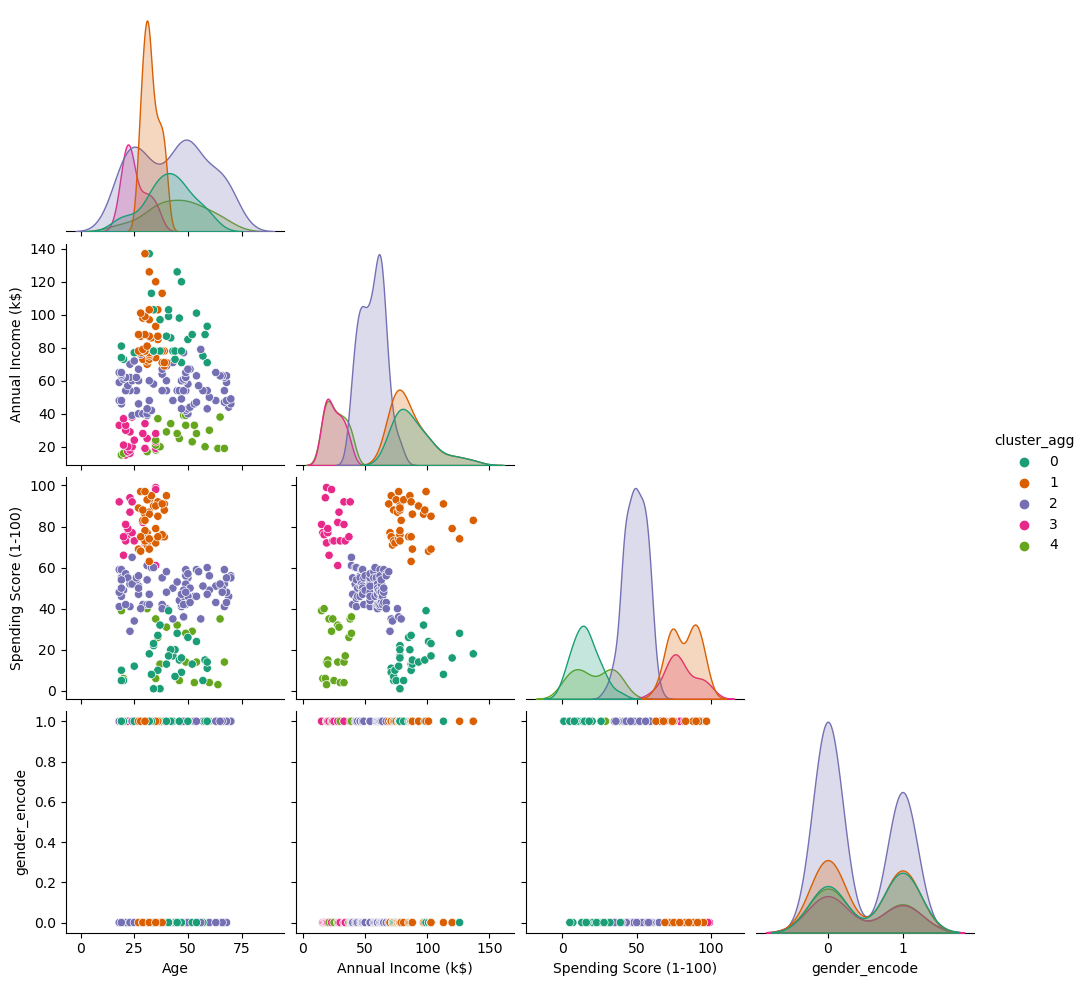

In [202]:
sns.pairplot(df2,kind='scatter',hue='cluster_agg',corner=True, palette='Dark2')

## Displaying the clusters and its features:

In [276]:
df2[df2.cluster_agg==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,41.000000,89.406250,15.593750,0.562500,0.0
std,11.036596,16.612975,8.936548,0.504016,0.0
min,19.000000,71.000000,1.000000,0.000000,0.0
25%,34.000000,78.000000,9.750000,0.000000,0.0
50%,41.500000,86.500000,15.000000,1.000000,0.0
75%,47.000000,98.250000,20.500000,1.000000,0.0
max,59.000000,137.000000,39.000000,1.000000,0.0


In [277]:
df2[df2.cluster_agg==1].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.461538,1.0
std,3.728650,16.312485,9.364489,0.505035,0.0
min,27.000000,69.000000,63.000000,0.000000,1.0
25%,30.000000,75.500000,74.500000,0.000000,1.0
50%,32.000000,79.000000,83.000000,0.000000,1.0
75%,35.500000,95.000000,90.000000,1.000000,1.0
max,40.000000,137.000000,97.000000,1.000000,1.0


In [278]:
df2[df2.cluster_agg==2].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
count,85.000000,85.000000,85.000000,85.000000,85.0
mean,42.482353,55.811765,49.129412,0.400000,2.0
std,16.395856,9.731508,7.281399,0.492805,0.0
min,18.000000,39.000000,29.000000,0.000000,2.0
25%,27.000000,48.000000,43.000000,0.000000,2.0
50%,46.000000,57.000000,49.000000,0.000000,2.0
75%,54.000000,63.000000,55.000000,1.000000,2.0
max,70.000000,79.000000,65.000000,1.000000,2.0


In [279]:
df2[df2.cluster_agg==3].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,25.333333,25.095238,80.047619,0.428571,3.0
std,5.378971,7.133756,10.249274,0.507093,0.0
min,18.000000,15.000000,61.000000,0.000000,3.0
25%,21.000000,19.000000,73.000000,0.000000,3.0
50%,23.000000,24.000000,77.000000,0.000000,3.0
75%,30.000000,30.000000,87.000000,1.000000,3.0
max,35.000000,38.000000,99.000000,1.000000,3.0


In [280]:
df2[df2.cluster_agg==4].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,cluster_agg
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,45.217391,26.304348,20.913043,0.391304,4.0
std,13.228607,7.893811,13.017167,0.499011,0.0
min,19.000000,15.000000,3.000000,0.000000,4.0
25%,35.500000,19.500000,9.500000,0.000000,4.0
50%,46.000000,25.000000,17.000000,0.000000,4.0
75%,53.500000,33.000000,33.500000,1.000000,4.0
max,67.000000,39.000000,40.000000,1.000000,4.0


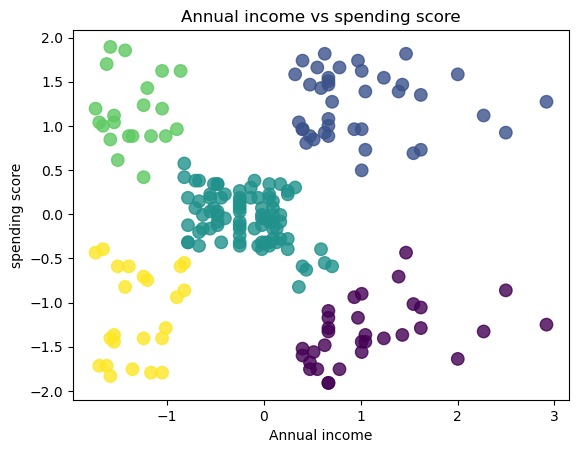

In [259]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=df2.cluster_agg.astype(float),s=80,alpha=0.8)
plt.title("Annual income vs spending score")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()

### Cluster 0 has mean age 41, mean annual income 89k and mean spending score 16.

### Cluster 1 has mean age 32, mean annual income 86k and mean spending score 82.

### Cluster 2 has mean age 42, mean annual income 56k and mean spending score 49.

### Cluster 3 has mean age 25, mean annual income 25k and mean spending score 80

### Cluster 4 has mean age 45, mean annual income 26k and mean spending score 21.

## DBSCAN:

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [209]:
df3=df.copy()
df3['gender_encode']= preprocessing.LabelEncoder().fit_transform(df3.Gender)
df3.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [210]:
ng = NearestNeighbors(n_neighbors=3)
ng.fit(X)
distances, indices = ng.kneighbors(X)

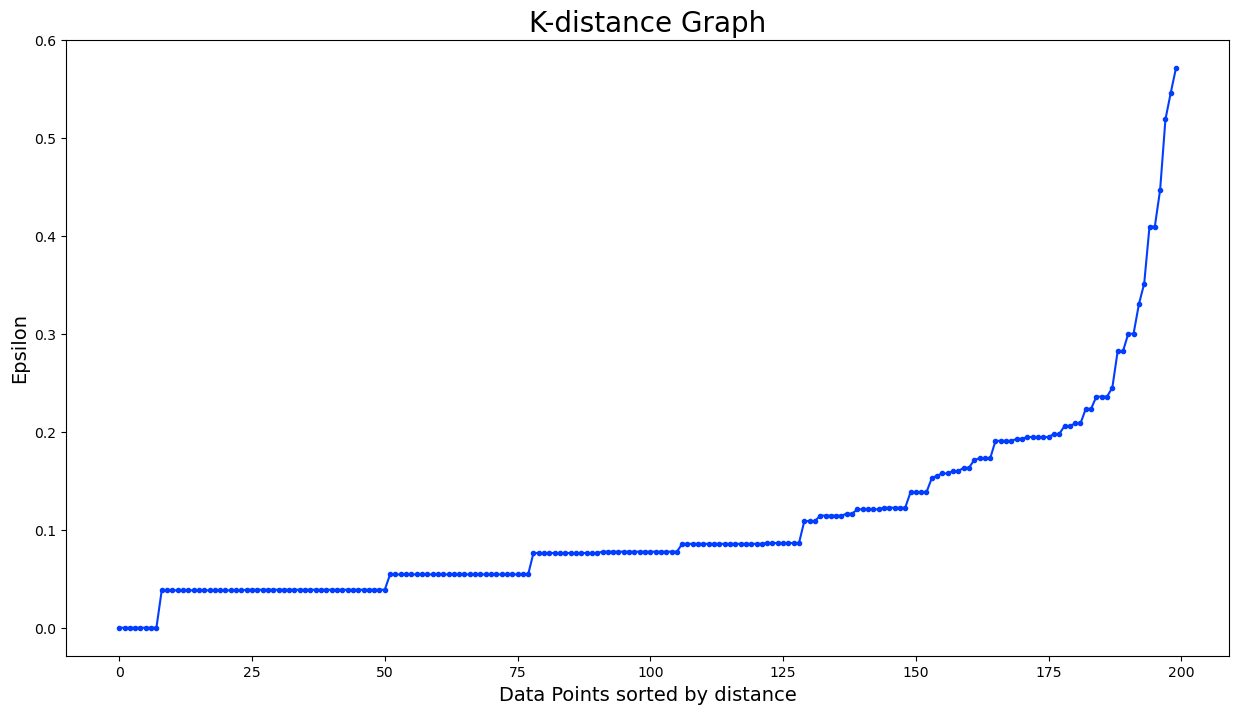

In [211]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
d1 = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(d1,marker='.')
#plt.axhline(y=25, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

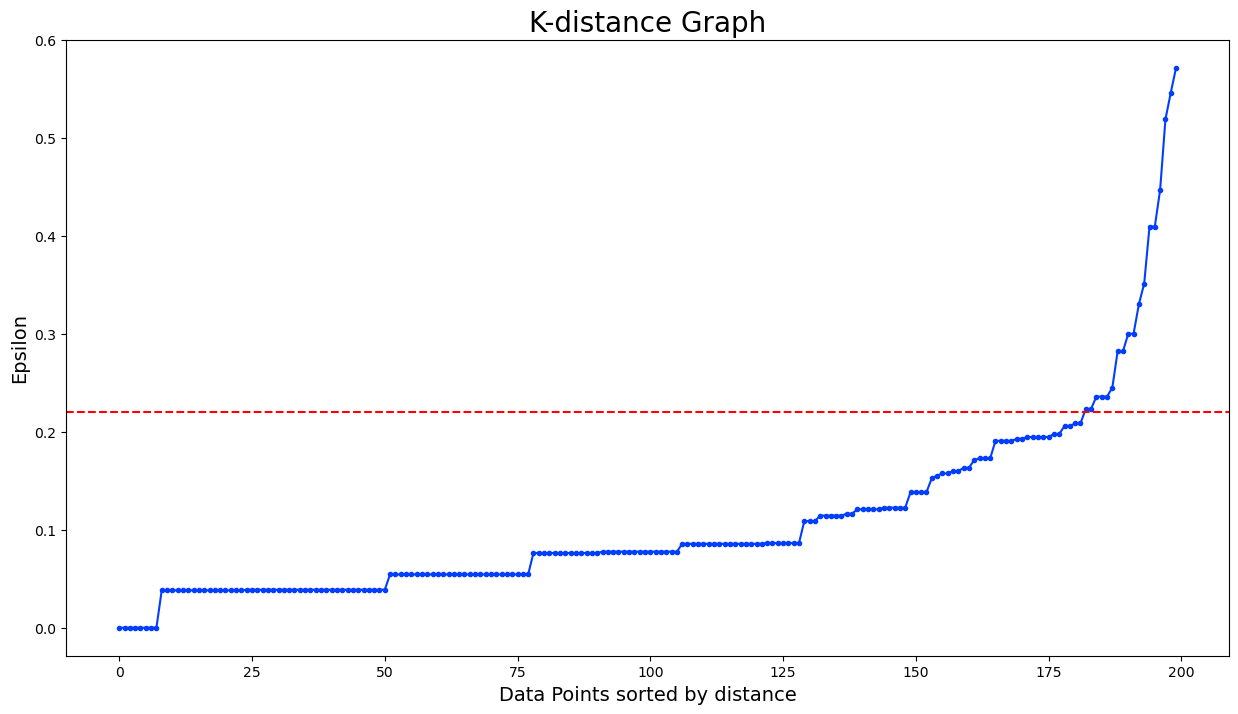

In [216]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
d2 = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(d2,marker='.')
plt.axhline(y=0.22, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [217]:
eps=.22
for min_samples in [5,6,7,8,9,10, 11, 12, 13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    x1= cluster_labels +2
    y = np.bincount(x1)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.22 | min_samples=  5 | obtained clustering:  [(1, 74), (2, 7), (3, 78), (4, 11), (5, 9), (6, 11), (7, 4), (8, 6)]
eps= 0.22 | min_samples=  6 | obtained clustering:  [(1, 79), (2, 7), (3, 78), (4, 10), (5, 9), (6, 11), (7, 6)]
eps= 0.22 | min_samples=  7 | obtained clustering:  [(1, 96), (2, 78), (3, 8), (4, 9), (5, 9)]
eps= 0.22 | min_samples=  8 | obtained clustering:  [(1, 114), (2, 77), (3, 9)]
eps= 0.22 | min_samples=  9 | obtained clustering:  [(1, 124), (2, 76)]
eps= 0.22 | min_samples=  10 | obtained clustering:  [(1, 125), (2, 75)]
eps= 0.22 | min_samples=  11 | obtained clustering:  [(1, 125), (2, 75)]
eps= 0.22 | min_samples=  12 | obtained clustering:  [(1, 126), (2, 74)]
eps= 0.22 | min_samples=  13 | obtained clustering:  [(1, 130), (2, 32), (3, 38)]
eps= 0.22 | min_samples=  14 | obtained clustering:  [(1, 130), (2, 32), (3, 38)]
eps= 0.22 | min_samples=  15 | obtained clustering:  [(1, 138), (2, 23), (3, 39)]


### Too many clusters are not ideal for solving business problems, hence we take 6 minimum samples and 0.6 epsilon.

In [228]:
dbs_hyp=DBSCAN(eps=.22,min_samples=6)
dbs_hyp.fit(X)

DBSCAN(eps=0.22, min_samples=6)

In [229]:
df3['DBSCAN_hyper_labels']=dbs_hyp.labels_
df3['DBSCAN_hyper_labels'].value_counts()

-1    79
 1    78
 4    11
 2    10
 3     9
 0     7
 5     6
Name: DBSCAN_hyper_labels, dtype: int64

In [230]:
pred=dbs_hyp.labels_
pred

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1,  5, -1, -1, -1,
        5, -1,  5, -1,  5, -1,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

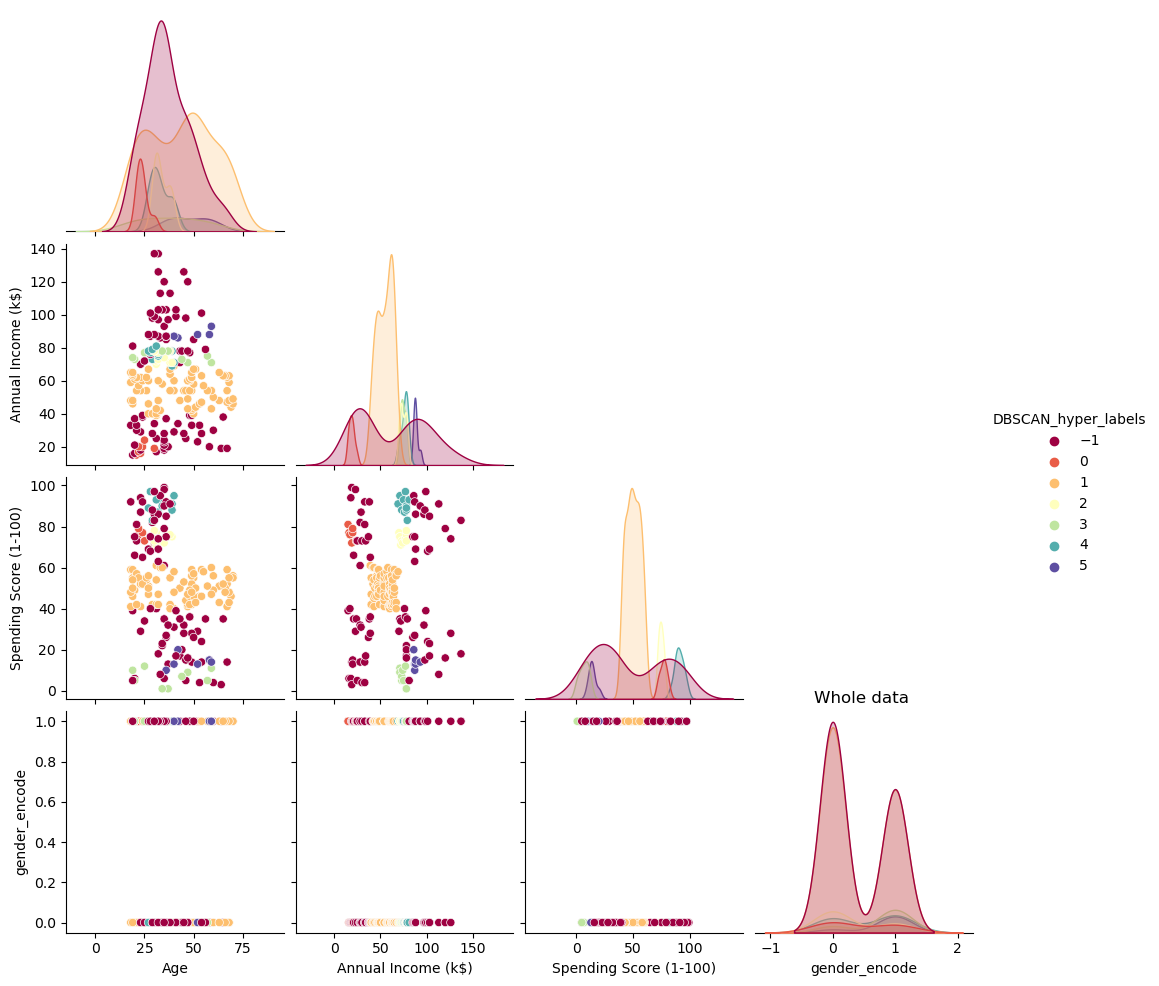

In [231]:
sns.pairplot(df3,kind='scatter',hue='DBSCAN_hyper_labels',corner=True,palette='Spectral')
plt.title("Whole data ")
plt.show()

## Displaying the clusters and its features:

In [281]:
df3[df3.DBSCAN_hyper_labels==-1].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,79.000000,79.000000,79.000000,79.000000,79.0
mean,36.886076,62.594937,47.075949,0.405063,-1.0
std,11.650891,36.747761,31.102301,0.494041,0.0
min,18.000000,15.000000,3.000000,0.000000,-1.0
25%,29.500000,28.000000,19.000000,0.000000,-1.0
50%,35.000000,71.000000,35.000000,0.000000,-1.0
75%,45.000000,95.000000,75.000000,1.000000,-1.0
max,67.000000,137.000000,99.000000,1.000000,-1.0


In [282]:
df3[df3.DBSCAN_hyper_labels==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,7.000000,7.000000,7.000000,7.000000,7.0
mean,23.857143,18.714286,76.428571,0.428571,0.0
std,3.023716,3.039424,3.154739,0.534522,0.0
min,21.000000,15.000000,72.000000,0.000000,0.0
25%,22.000000,16.500000,74.500000,0.000000,0.0
50%,23.000000,19.000000,77.000000,0.000000,0.0
75%,24.500000,20.000000,78.000000,1.000000,0.0
max,30.000000,24.000000,81.000000,1.000000,0.0


In [283]:
df3[df3.DBSCAN_hyper_labels==1].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,78.000000,78.000000,78.000000,78.000000,78.0
mean,43.128205,54.615385,50.025641,0.410256,1.0
std,16.553227,8.430358,6.083775,0.495064,0.0
min,18.000000,39.000000,40.000000,0.000000,1.0
25%,27.000000,48.000000,46.000000,0.000000,1.0
50%,47.000000,54.000000,50.000000,0.000000,1.0
75%,54.750000,62.000000,55.000000,1.000000,1.0
max,70.000000,69.000000,61.000000,1.000000,1.0


In [288]:
df3[df3.DBSCAN_hyper_labels==2].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,33.600000,74.200000,74.400000,0.300000,2.0
std,3.565265,3.259175,2.221111,0.483046,0.0
min,30.000000,70.000000,71.000000,0.000000,2.0
25%,31.000000,71.250000,73.000000,0.000000,2.0
50%,32.000000,73.500000,74.500000,0.000000,2.0
75%,37.250000,77.750000,75.750000,0.750000,2.0
max,39.000000,78.000000,78.000000,1.000000,2.0


In [290]:
df3[df3.DBSCAN_hyper_labels==3].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,38.000000,74.444444,6.777778,0.777778,3.0
std,14.958275,2.743680,4.085884,0.440959,0.0
min,19.000000,71.000000,1.000000,0.000000,3.0
25%,25.000000,73.000000,5.000000,1.000000,3.0
50%,37.000000,74.000000,7.000000,1.000000,3.0
75%,47.000000,77.000000,10.000000,1.000000,3.0
max,59.000000,78.000000,12.000000,1.000000,3.0


In [291]:
df3[df3.DBSCAN_hyper_labels==4].describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_encode,DBSCAN_hyper_labels
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,32.727273,75.909091,90.363636,0.545455,4.0
std,4.692354,3.618136,3.981777,0.522233,0.0
min,27.000000,69.000000,83.000000,0.000000,4.0
25%,29.000000,74.000000,88.000000,0.000000,4.0
50%,32.000000,77.000000,90.000000,1.000000,4.0
75%,36.500000,78.000000,93.000000,1.000000,4.0
max,40.000000,81.000000,97.000000,1.000000,4.0


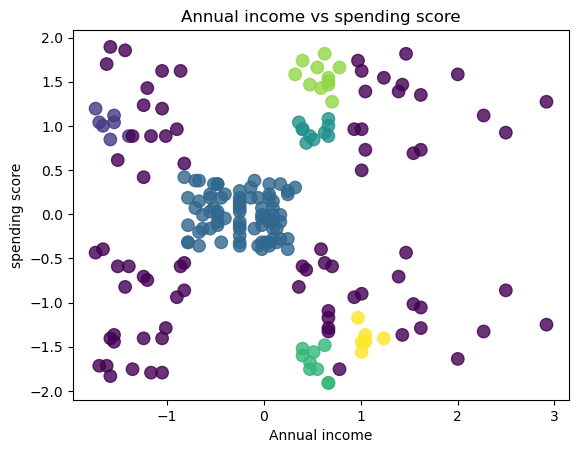

In [287]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=df3.DBSCAN_hyper_labels.astype(float),s=80,alpha=0.8)
plt.title("Annual income vs spending score")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()

### Cluster -1 has mean age 36, mean annual income 62k and mean spending score 47.

### Cluster 0 has mean age 23, mean annual income 18k and mean spending score 76.

### Cluster 1 has mean age 43, mean annual income 54k and mean spending score 50.

### Cluster 2 has mean age 33, mean annual income 74k and mean spending score 74.

### Cluster 3 has mean age 38, mean annual income 74k and mean spending score 7.

### Cluster 4 has mean age 32, mean annual income 75k and mean spending score 90.

### Cluster 5 has mean age 33, mean annual income 76k and mean spending score 90.

## Final Interpretation:

### DBSCAN provides better clustering and importance to details. Hence we can choose DBSCAN for model building and deployment.